# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 30)                270       
                                                                 
 dense_19 (Dense)            (None, 30)                930       
                                                                 
 dense_20 (Dense)            (None, 30)                930       
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4047 - val_loss: 0.4333
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4008 - val_loss: 0.4407
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3973 - val_loss: 0.4344
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3940 - val_loss: 0.4400
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3911 - val_loss: 0.4347
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3881 - val_loss: 0.4363
Epoch 7/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3857 - val_loss: 0.4384
Epoch 8/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3833 - val_loss: 0.4320
Epoch 9/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3810 - val_loss: 0.4291
Epoch 10/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3789 - val_loss: 0.4330

In [47]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def average(lst):
    sum = 0
    for item in lst:
        sum += item
    return sum / len(lst)
    

In [49]:
history_chunked_by_15 = chunks(history.history['loss'], 15)

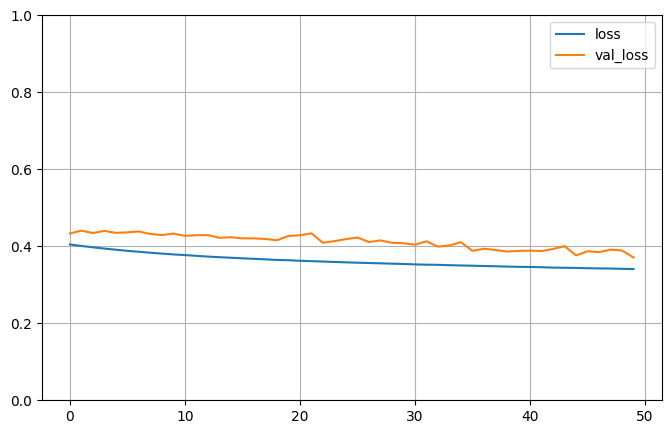

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
y_pred

array([[0.789479 ],
       [1.7672293],
       [4.197307 ]], dtype=float32)

In [42]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 771us/step - loss: 0.3438


0.34377822279930115